In [4]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import xgboost
from sklearn.cluster import KMeans
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "Malgun Gothic"

# 부동산 추이 지표 와 전입전출자 수를 활용한                         KMeans

In [8]:
동별_부동산_추이_및_지표 = pd.read_csv('./부동산_관련_자료/동별_부동산_추이_지표.csv', encoding='utf-8')
세종시_행정동별_전입전출자수 =pd.read_csv('./부동산_관련_자료/세종시_행정동별_전입전출자수.csv')

In [9]:
data1 = 세종시_행정동별_전입전출자수[['행정동명','전출_대비_전입_비율']]
data2 = 동별_부동산_추이_및_지표[['동이름','부동산_지표']]

In [10]:
세종시_전출전입_부동산 = pd.merge(data1,data2,left_on='행정동명',right_on='동이름')

세종시_전출전입_부동산=세종시_전출전입_부동산.drop('동이름',axis=1)

세종시_전출전입_부동산['전출_대비_전입_비율'] = 세종시_전출전입_부동산['전출_대비_전입_비율'].astype('int')
세종시_전출전입_부동산['부동산_지표'] = 세종시_전출전입_부동산['부동산_지표'].astype('int')

## 극단값에 영향을 적게 받게 하기 위해 MinMax Scaler 적용 하였습니다

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
세종시_전출전입_부동산[['전출_대비_전입_비율','부동산_지표']] = scaler.fit_transform(세종시_전출전입_부동산[['전출_대비_전입_비율','부동산_지표']])

In [12]:
세종시_군집 = 세종시_전출전입_부동산.copy()

In [13]:
def elbow(X) :
    sse = []
    for i in range(1,11) :
        km= KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
            
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('Cluster count')
    plt.ylabel('SSE')
    plt.axvline(x = 3, linestyle = '--', color = 'red')
    plt.show()
    

## 군집화 갯수를 정하기 위해 Elbow graph를 그렸습니다

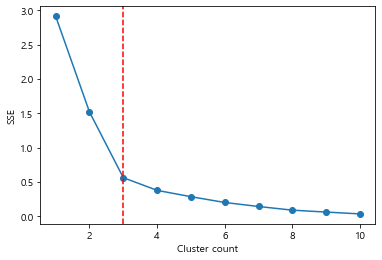

In [14]:
elbow(세종시_군집[['전출_대비_전입_비율','부동산_지표']])

In [15]:
km1 = KMeans(n_clusters = 3)
km1.fit(세종시_군집[['전출_대비_전입_비율','부동산_지표']])

KMeans(n_clusters=3)

In [16]:
세종시_군집['K_label'] = km1.labels_

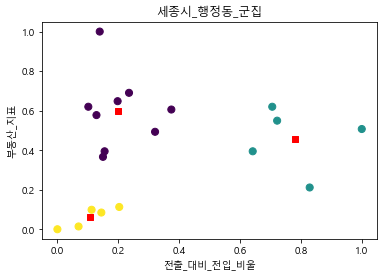

In [17]:
plt.scatter(세종시_군집['전출_대비_전입_비율'],세종시_군집['부동산_지표'], s =50, c=세종시_군집['K_label'])
plt.scatter(0.10588235, 0.06197183, s=30, c='r', marker='s')
plt.scatter(0.20023767, 0.59937402, s=30, c='r', marker='s')
plt.scatter(0.77967914, 0.45633803, s=30, c='r', marker='s')
plt.xlabel('전출_대비_전입_비울')
plt.ylabel('부동산_지표')
plt.title('세종시_행정동_군집')
plt.show()

In [18]:
세종시_군집.to_csv('./부동산_관련_자료/세종시_군집.csv',index = False)